<a href="https://colab.research.google.com/github/prahlad-pallav/Stock_Market_Analysis/blob/main/Index_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To fetch the Nifty 50 historical data, I'll use the `yfinance` library. If you don't have it installed, you can install it by running the following command:

In [8]:
%pip install yfinance

Now I'll fetch the data using the `yfinance` library.

In [9]:
import yfinance as yf

# Fetch Nifty 50 data
nifty50_data = yf.download('^NSEI', period='max')

# Display the first few rows of the data
print(nifty50_data.head())

/tmp/ipython-input-9-2624288101.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty50_data = yf.download('^NSEI', period='max')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI  ^NSEI
Date                                                                 
2007-09-17  4494.649902  4549.049805  4482.850098  4518.450195      0
2007-09-18  4546.200195  4551.799805  4481.549805  4494.100098      0
2007-09-19  4732.350098  4739.000000  4550.250000  4550.250000      0
2007-09-20  4747.549805  4760.850098  4721.149902  4734.850098      0
2007-09-21  4837.549805  4855.700195  4733.700195  4752.950195      0


Now, I'll plot the closing price of Nifty 50 over time using `matplotlib`.

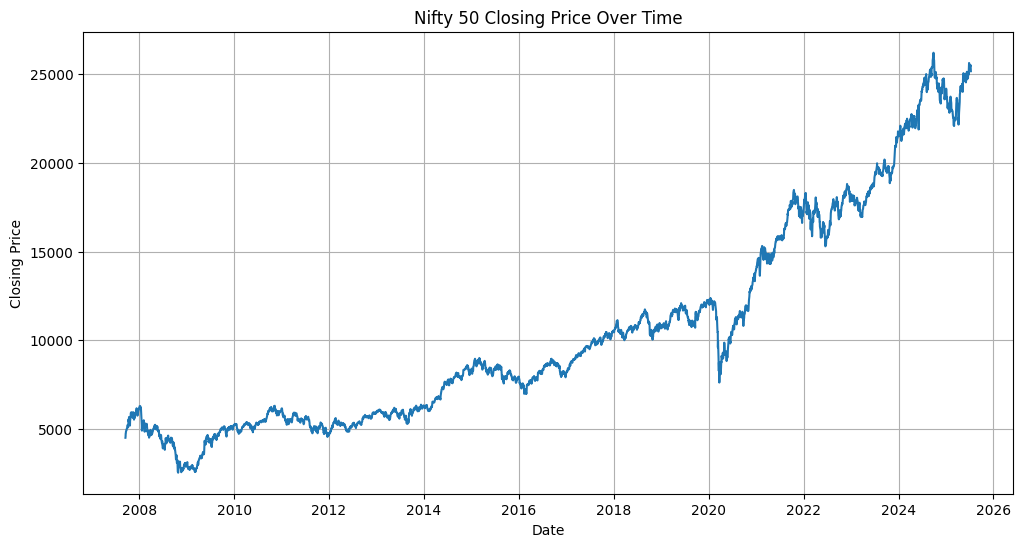

In [11]:
import matplotlib.pyplot as plt

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(nifty50_data.index, nifty50_data['Close'])
plt.title('Nifty 50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

Following the plan, I will now fetch the historical data for HDFC Bank using `yfinance`. The ticker symbol for HDFC Bank on the National Stock Exchange (NSE) is typically 'HDFCBANK.NS'. I will fetch the data for the same period as the Nifty 50 data we already have.